About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

Problem Statement: 

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

* We will have to clean the data and make sense out of the data

# Importing Libraries

# Basic Observations

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [210]:
# loading data
df = pd.read_csv('/Users/mojo/ML/Scaler/Projects/Delhivery Feature Engineering/delhivery_data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [211]:
# finding shape of data
df.shape

(144867, 24)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

Column Profiling:

- data - tells whether the data is testing or training data
- trip_creation_time – Timestamp of trip creation
- route_schedule_uuid – Unique Id for a particular route schedule
- route_type – Transportation type
- FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
- Carting: Handling system consisting of small vehicles (carts)
- trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
- source_center - Source ID of trip origin
- source_name - Source Name of trip origin
- destination_cente – Destination ID
- destination_name – Destination Name
- od_start_time – Trip start time
- od_end_time – Trip end time
- start_scan_to_end_scan – Time taken to deliver from source to destination
- is_cutoff – Unknown field
- cutoff_factor – Unknown field
- cutoff_timestamp – Unknown field
- actual_distance_to_destination – Distance in Kms between source and destination warehouse
- actual_time – Actual time taken to complete the delivery (Cumulative)
- osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
- factor – Unknown field
- segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
- segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
- segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
- segment_factor – Unknown field

## Managing data types

- first we will drop the cols with unknown fields

In [213]:
df.drop(columns=['is_cutoff','cutoff_factor','cutoff_timestamp','factor', 'segment_factor','data'], inplace=True)

In [214]:
df.dtypes

trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
dtype: object

In [215]:
df.head().T

,0,1,2,3,4
trip_creation_time,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840
route_schedule_uuid,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...
route_type,Carting,Carting,Carting,Carting,Carting
trip_uuid,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320
source_center,IND388121AAA,IND388121AAA,IND388121AAA,IND388121AAA,IND388121AAA
source_name,Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat)
destination_center,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB
destination_name,Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat)
od_start_time,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600
od_end_time,2018-09-20 04:47:45.236797,2018-09-20 04:47:45.236797,2018-09-20 04:47:45.236797,2018-09-20 04:47:45.236797,2018-09-20 04:47:45.236797


- We can see that categorical data is represented in object form
- We will have to convert trip_creation_time, od_start_time,od_end_time, cutoff_timestamp into date time format

In [216]:
# converting data types of date and time#
for col in ['trip_creation_time', 'od_start_time','od_end_time']:
    df[col] = df[col].astype('datetime64')

In [217]:
num_cols = df.dtypes =='float64'
num_cols = list(num_cols[num_cols].index)
num_cols

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance']

In [218]:
cat_cols = df.dtypes=='object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name']

In [219]:
# converting data types of the cat cols
# for col in cat_cols:
#     df[col]= df[col].astype('category')

In [220]:
df.dtypes

trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time                      float64
segment_osrm_time                        float64
segment_osrm_distance                    float64
dtype: object

## Handling Missing values

In [221]:
# Checking missing values
df.isna().sum()

trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

- We can see that the source_name and destination_name are the only columns with the missing values
- We will try to see if the center code can help us to fill the names of the source and destination center.

In [222]:
# here we can see that the source center name value is not present 
df[df['source_name'].isna()].groupby('source_center').count()


,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
source_center,,,,,,,,,,,,,,,,,
IND126116AAA,20,20,20,20,0,20,20,20,20,20,20,20,20,20,20,20,20
IND282002AAD,128,128,128,128,0,128,128,128,128,128,128,128,128,128,128,128,128
IND331022A1B,3,3,3,3,0,3,0,3,3,3,3,3,3,3,3,3,3
IND342902A1B,90,90,90,90,0,90,90,90,90,90,90,90,90,90,90,90,90
IND465333A1B,6,6,6,6,0,6,6,6,6,6,6,6,6,6,6,6,6
IND505326AAB,5,5,5,5,0,5,5,5,5,5,5,5,5,5,5,5,5
IND509103AAC,17,17,17,17,0,17,17,17,17,17,17,17,17,17,17,17,17
IND577116AAA,16,16,16,16,0,16,16,16,16,16,16,16,16,16,16,16,16
IND841301AAC,5,5,5,5,0,5,5,5,5,5,5,5,5,5,5,5,5


In [223]:
df[df['destination_name'].isna()].groupby('destination_center').count()

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
destination_center,,,,,,,,,,,,,,,,,
IND122015AAC,8,8,8,8,8,8,0,8,8,8,8,8,8,8,8,8,8
IND126116AAA,10,10,10,10,10,10,0,10,10,10,10,10,10,10,10,10,10
IND221005A1A,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
IND250002AAC,9,9,9,9,9,9,0,9,9,9,9,9,9,9,9,9,9
IND282002AAD,151,151,151,151,151,151,0,151,151,151,151,151,151,151,151,151,151
IND331001A1C,3,3,3,3,3,0,0,3,3,3,3,3,3,3,3,3,3
IND342902A1B,16,16,16,16,16,16,0,16,16,16,16,16,16,16,16,16,16
IND465333A1B,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3,3
IND505326AAB,11,11,11,11,11,11,0,11,11,11,11,11,11,11,11,11,11


In [224]:
list_missing_dst_name = df[df['destination_name'].isna()]['destination_center'].unique()
list_missing_dst_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [225]:
df.isna().sum()/len(df)

trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.002023
destination_center                0.000000
destination_name                  0.001802
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
dtype: float64

- We can see that the missing value is less than 1% we can easily drop them

In [226]:
df.dropna(inplace=True)
df.isna().sum()

trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

## Creating trips based data frame 

- Grouping the subjourney in a trip

In [227]:
df['segment_key'] = df['trip_uuid'] + df['source_center']+ df['destination_center']
segment_cols = ['segment_actual_time','segment_osrm_time', 'segment_osrm_distance']
for col in segment_cols:
    df[col+'_sum']=df.groupby('segment_key')[col].cumsum()
df[[col+'_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,14.0,11.0,11.9653
1,24.0,20.0,21.7243
2,40.0,27.0,32.5395
3,61.0,39.0,45.5619
4,67.0,44.0,49.4772
...,...,...,...
144862,92.0,94.0,65.3487
144863,118.0,115.0,82.7212
144864,138.0,149.0,103.4265
144865,155.0,176.0,122.3150


In [228]:
df['od_time_diff_hour']=(df["od_end_time"]-df["od_start_time"])/pd.Timedelta(1, unit='hour')
df.drop(columns=['od_end_time', 'od_start_time'], inplace=True)
df.columns

Index(['trip_creation_time', 'route_schedule_uuid', 'route_type', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_key', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum',
       'od_time_diff_hour'],
      dtype='object')

In [229]:
func_dictt={
    'trip_creation_time':'first',
    'route_schedule_uuid':'first',
    'route_type':'first',
    'trip_uuid':'first',
    'source_center':'first',
    'source_name':'first',
    'destination_center':'last',
    'destination_name':'last',
    'start_scan_to_end_scan':'sum',
    'actual_distance_to_destination':'sum',
    'actual_time':'sum',
    'osrm_time':'sum',
    'osrm_distance':'sum',
    'segment_actual_time':'sum',
    'segment_osrm_time':'sum',
    'segment_osrm_distance':'sum',
    'segment_key':'sum',
    'segment_actual_time_sum':'sum',
    'segment_osrm_time_sum':'sum',
    'segment_osrm_distance_sum':'sum',
    'od_time_diff_hour':'sum'
    }

In [230]:
df_trips = df.groupby('trip_uuid').agg(func_dictt).reset_index(drop=True)


In [231]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_creation_time              14787 non-null  datetime64[ns]
 1   route_schedule_uuid             14787 non-null  object        
 2   route_type                      14787 non-null  object        
 3   trip_uuid                       14787 non-null  object        
 4   source_center                   14787 non-null  object        
 5   source_name                     14787 non-null  object        
 6   destination_center              14787 non-null  object        
 7   destination_name                14787 non-null  object        
 8   start_scan_to_end_scan          14787 non-null  float64       
 9   actual_distance_to_destination  14787 non-null  float64       
 10  actual_time                     14787 non-null  float64       
 11  os

In [232]:
df_trips.trip_uuid.nunique()

14787

- We can see that there are noly 14787 trips and the data is merged using the sub segment points

## Statistical summary

In [233]:
# shape of data after missing values removal
df_trips.shape

(14787, 21)

In [234]:
df_trips.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,14787.0,9405.355853,33734.920594,26.000000,406.000000,980.000000,2814.000000,396800.000000
actual_distance_to_destination,14787.0,2290.673675,8806.795817,9.002461,49.580093,133.933562,460.606591,85110.885093
actual_time,14787.0,4079.498546,15231.934085,9.000000,142.000000,346.000000,1059.000000,167920.000000
osrm_time,14787.0,2092.831406,7964.769556,6.000000,61.000000,167.000000,510.500000,76953.000000
osrm_distance,14787.0,2786.867034,10769.741065,9.072900,65.635550,172.886300,603.955400,102415.868000
segment_actual_time,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000
segment_osrm_time,14787.0,180.511598,314.679279,6.000000,30.000000,65.000000,184.000000,2564.000000
segment_osrm_distance,14787.0,222.705466,416.846279,9.072900,32.578850,69.784200,216.560600,3523.632400
segment_actual_time_sum,14787.0,4038.942449,15076.443642,9.000000,140.000000,342.000000,1050.000000,166655.000000
segment_osrm_time_sum,14787.0,2375.041793,9231.485173,6.000000,63.000000,176.000000,550.000000,82478.000000


observation:
- start_scan_to_end_scan, cutoff_factor, actual_distance_to_destination, actual_time, osrm_time and osrm_distance  : are right tails distribution because the mean is in the right of the median.
- segment_actual_time and segment_factor have negtive values and will bring down the means a lot.


In [235]:
df_trips.describe(include='object').T

,count,unique,top,freq
route_schedule_uuid,14787,1497,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,53
route_type,14787,2,Carting,8906
trip_uuid,14787,14787,trip-153671041653548748,1
source_center,14787,865,IND000000ACB,937
source_name,14787,865,Gurgaon_Bilaspur_HB (Haryana),937
destination_center,14787,951,IND000000ACB,813
destination_name,14787,951,Gurgaon_Bilaspur_HB (Haryana),813
segment_key,14787,14787,trip-153671041653548748IND462022AAAIND209304AA...,1


- We can see the unique values for each of the feature here too.

### Build some features to prepare the data for actual analysis. Extract features from the below fields:
- Destination Name: Split and extract features out of destination. City-place-code (State)
- Source Name: Split and extract features out of destination. City-place-code (State)
- Trip_creation_time: Extract features like month, year and day etc

In [236]:
df_trips['source_name']

0         Bhopal_Trnsport_H (Madhya Pradesh)
1              Tumkur_Veersagr_I (Karnataka)
2           Bangalore_Nelmngla_H (Karnataka)
3                   Mumbai Hub (Maharashtra)
4                     Bellary_Dc (Karnataka)
                        ...                 
14782         Chandigarh_Mehmdpur_H (Punjab)
14783           FBD_Balabhgarh_DPC (Haryana)
14784     Kanpur_Central_H_6 (Uttar Pradesh)
14785    Tirunelveli_VdkkuSrt_I (Tamil Nadu)
14786                     Hospet (Karnataka)
Name: source_name, Length: 14787, dtype: object

In [237]:
df_trips["source_city"] = df_trips["source_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
df_trips["source_state"] = df_trips["source_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")

df_trips["destination_city"] = df_trips["destination_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
df_trips["destination_state"] = df_trips["destination_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")


In [238]:
df_trips["source_place"] = df_trips["source_name"].str.split("_",n=2,expand=True)[1]
df_trips["destination_place"] = df_trips["destination_name"].str.split("_",n=2,expand=True)[1]

df_trips["source_pincode"] = df_trips["source_center"].apply(lambda x : x[3:9] )
df_trips["destination_pincode"] = df_trips["destination_center"].apply(lambda x : x[3:9] )

In [239]:
df_trips

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,...,segment_osrm_distance_sum,od_time_diff_hour,source_city,source_state,destination_city,destination_state,source_place,destination_place,source_pincode,destination_pincode
0,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),43659.0,8860.812105,...,14222.1104,728.008209,Bhopal,Madhya Pradesh,Gurgaon,Haryana,Trnsport,Bilaspur,462022,000000
1,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),906.0,240.208306,...,268.5094,15.219568,Tumkur,Karnataka,Chikblapur,Karnataka,Veersagr,ShntiSgr,572101,562101
2,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),248631.0,68163.502238,...,90479.7151,4144.906395,Bangalore,Karnataka,Chandigarh,Punjab,Nelmngla,Mehmdpur,562132,160002
3,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),200.0,28.529648,...,31.8441,3.349831,Mumbai,Hub Maharashtra,Mumbai,Maharashtra,None,MiraRd,400072,401104
4,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),1586.0,239.007304,...,266.2915,26.478517,Bellary,Karnataka,Bellary,Karnataka,Dc (Karnataka),Dc (Karnataka),583101,583101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),876.0,141.057373,...,154.3394,14.655464,Chandigarh,Punjab,Chandigarh,Punjab,Mehmdpur,Mehmdpur,160002,160002
14783,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),120.0,25.130640,...,26.5334,2.019684,FBD,Haryana,Faridabad,Haryana,Balabhgarh,Blbgarh,121004,121004
14784,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),1263.0,93.743842,...,249.4333,21.105993,Kanpur,Uttar Pradesh,Kanpur,Uttar Pradesh,Central,Central,209304,209304
14785,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),1315.0,355.281673,...,520.5464,22.006709,Tirunelveli,Tamil Nadu,Tirunelveli,Tamil Nadu,VdkkuSrt,VdkkuSrt,627005,627005


#### Trip_creation_time: Extract features like month, year and day etc

In [240]:
df_trips["trip_creation_day"] = df_trips["trip_creation_time"].dt.day_name()
df_trips["trip_creation_month"] = df_trips["trip_creation_time"].dt.month_name()
df_trips["trip_creation_year"] = df_trips["trip_creation_time"].dt.year

In [241]:
df_trips.dtypes

trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
start_scan_to_end_scan                   float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time                      float64
segment_osrm_time                        float64
segment_osrm_distance                    float64
segment_key                               object
segment_actual_time_sum                  float64
segment_osrm_time_sum                    float64
segment_osrm_distance_sum                float64
od_time_diff_hour   

In [242]:
df_trips.trip_creation_year.value_counts()

2018    14787
Name: trip_creation_year, dtype: int64

In [243]:
df_trips.trip_creation_month.value_counts()

September    13011
October       1776
Name: trip_creation_month, dtype: int64

In [244]:
df_trips.dtypes

trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
start_scan_to_end_scan                   float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time                      float64
segment_osrm_time                        float64
segment_osrm_distance                    float64
segment_key                               object
segment_actual_time_sum                  float64
segment_osrm_time_sum                    float64
segment_osrm_distance_sum                float64
od_time_diff_hour   

# Visual Analysis

In [245]:
# cat_cols = df_trips
cat_cols = df_trips.dtypes =='object'
cat_cols = cat_cols[cat_cols].index
cat_cols

Index(['route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center',
       'source_name', 'destination_center', 'destination_name', 'segment_key',
       'source_city', 'source_state', 'destination_city', 'destination_state',
       'source_place', 'destination_place', 'source_pincode',
       'destination_pincode', 'trip_creation_day', 'trip_creation_month'],
      dtype='object')

In [246]:
num_cols = df_trips.dtypes =='float64'
num_cols = num_cols[num_cols].index
num_cols

Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum',
       'od_time_diff_hour'],
      dtype='object')

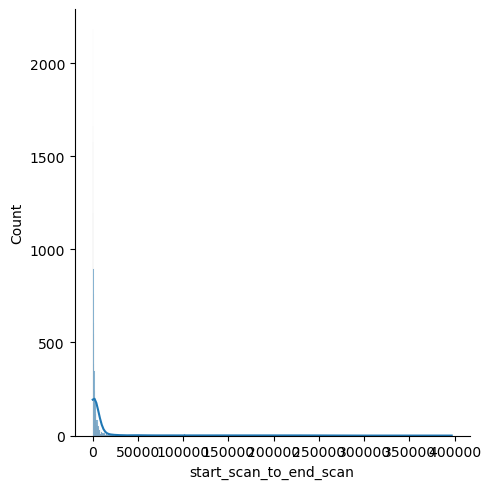

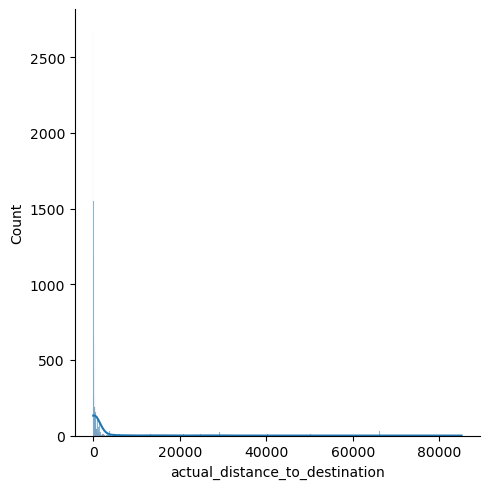

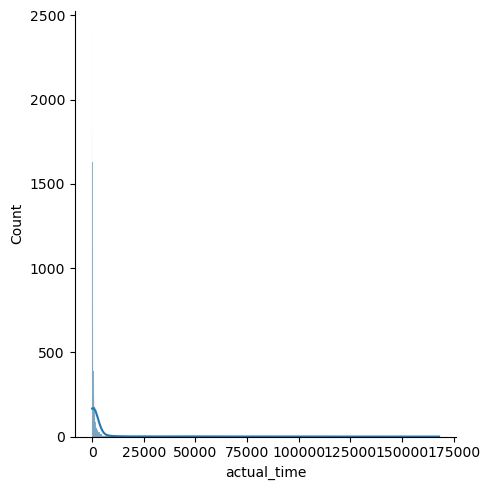

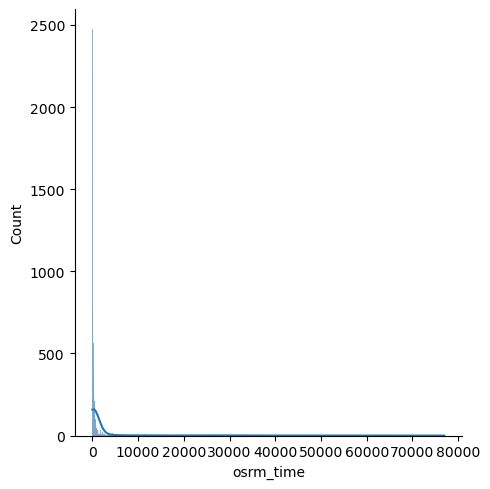

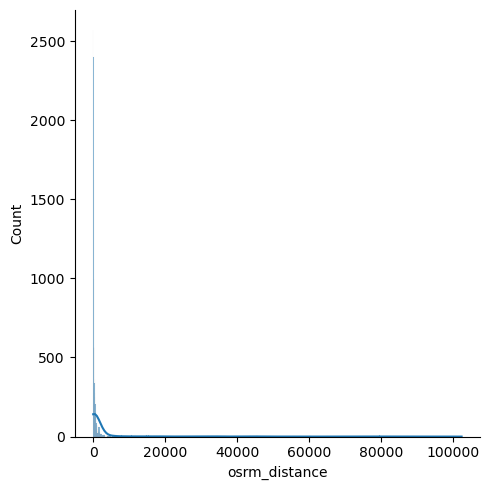

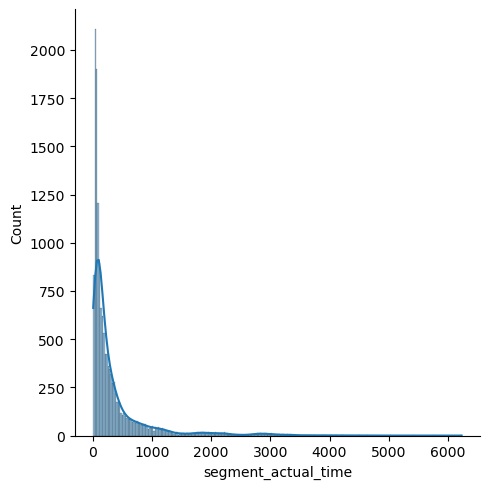

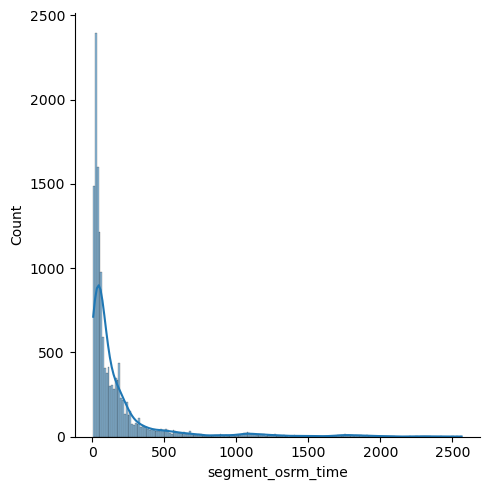

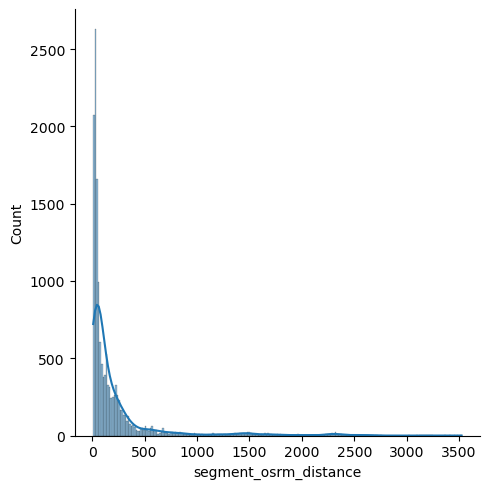

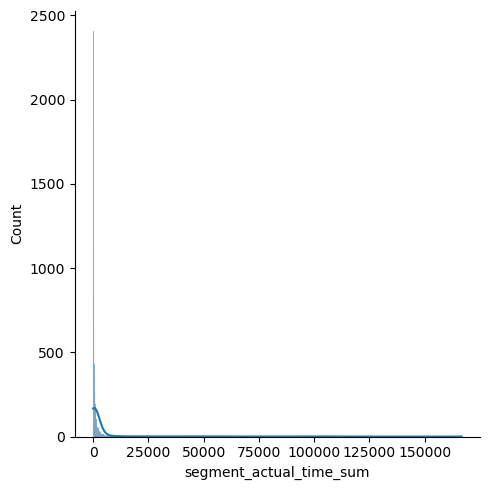

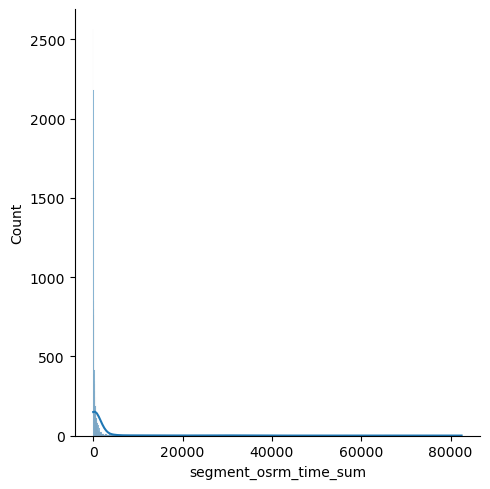

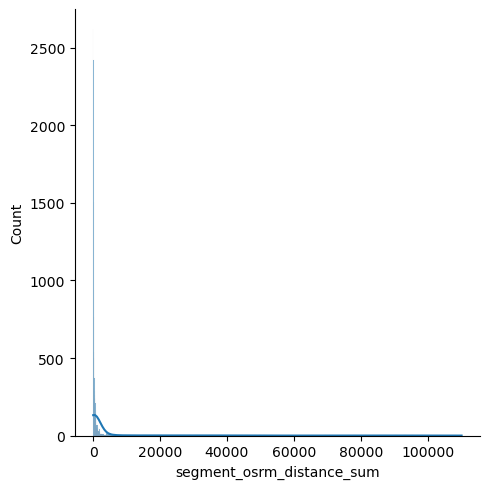

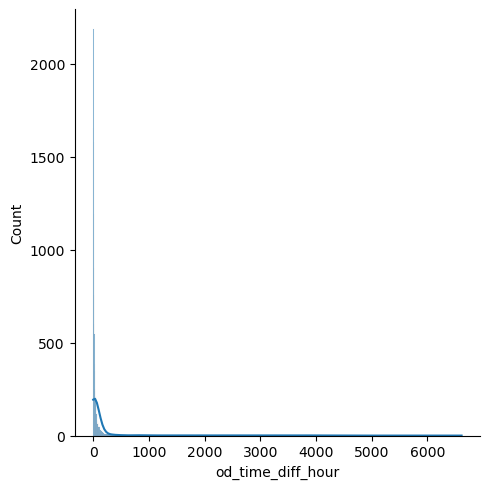

In [247]:
for col in num_cols:
    sns.displot(data=df_trips, x=col, kde=True);

- As we can see most of the data is right skewed. 
- start_scan_to_end_scan – Time taken to deliver from source to destination.
    - we can see that the orders are getting delay 4000 units after that there is not much delay. still we can  refer that the data is skewed because of outliers. 
- actual_distance_to_destination: Here we can notice that the data has a peak. Which states that maximum nuber of the ordersa re delivered quite on time. The meadian for data is in the extreme left side. Means orders are delivered quite early.
- this is the sam story for rest of the features.

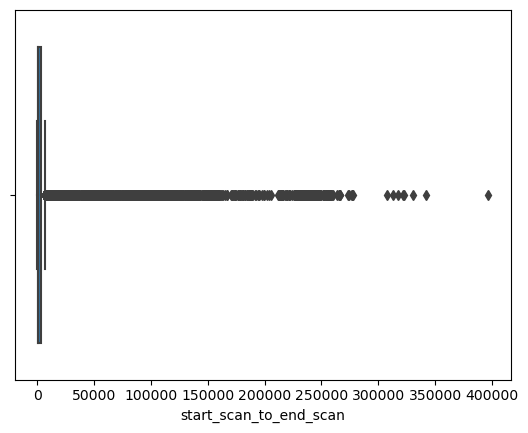

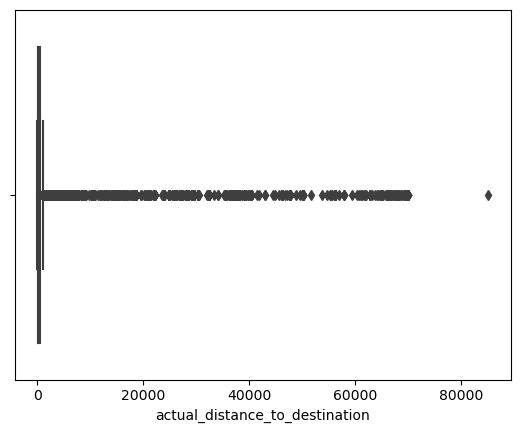

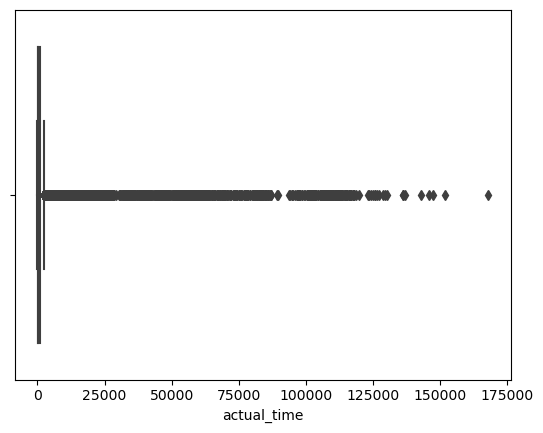

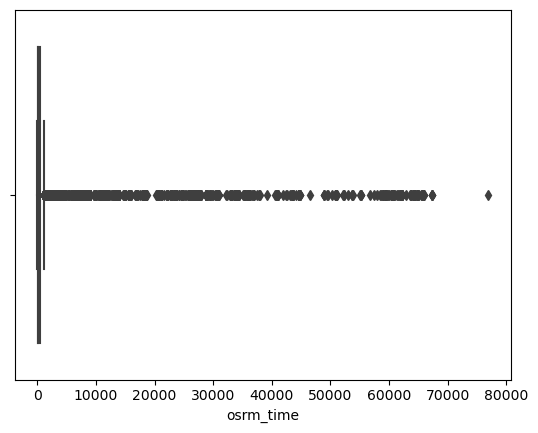

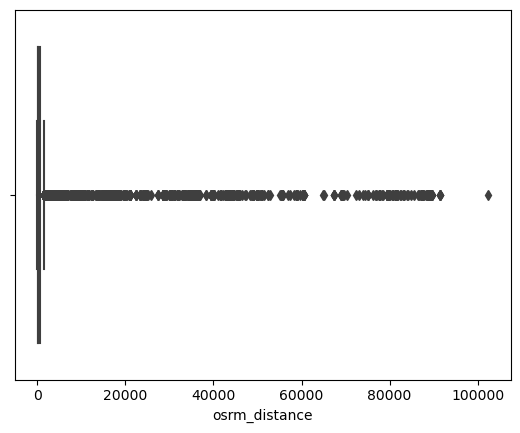

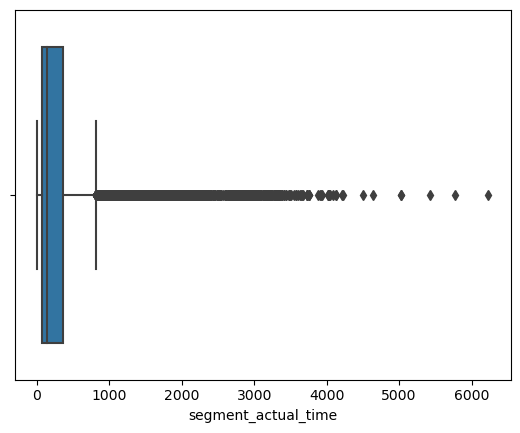

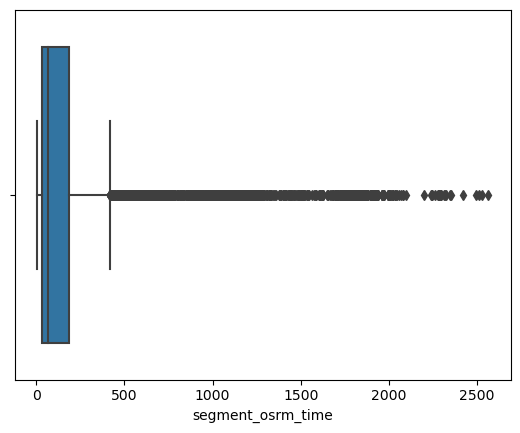

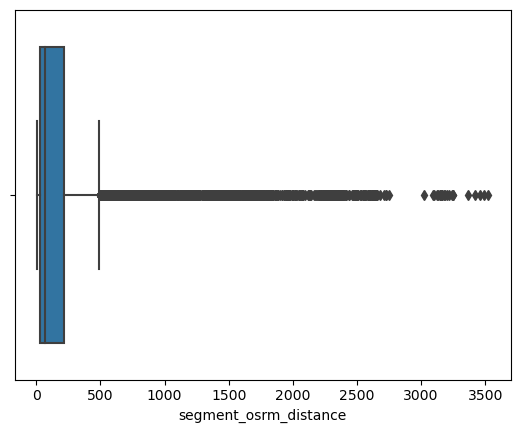

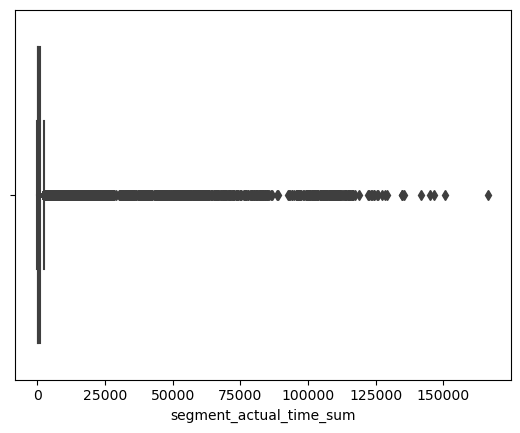

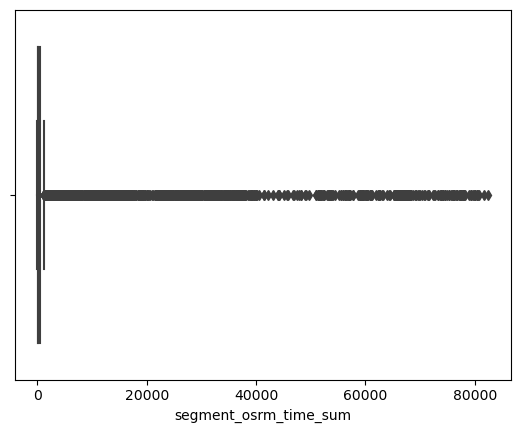

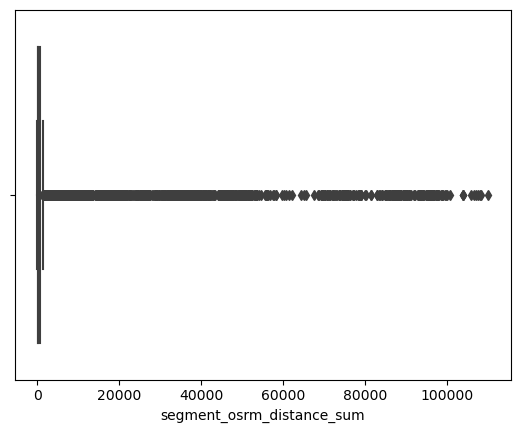

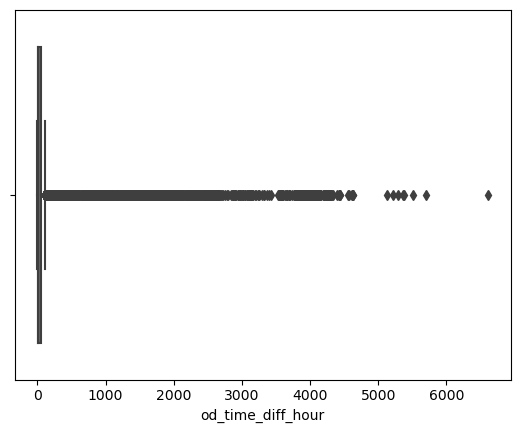

In [248]:
for col in num_cols:
    sns.boxplot(data=df_trips, x=col, orient='v')
    plt.show()

- We can see that there are lots of outliers in all the data
- We are not able to identify a way to handle this type of data. 

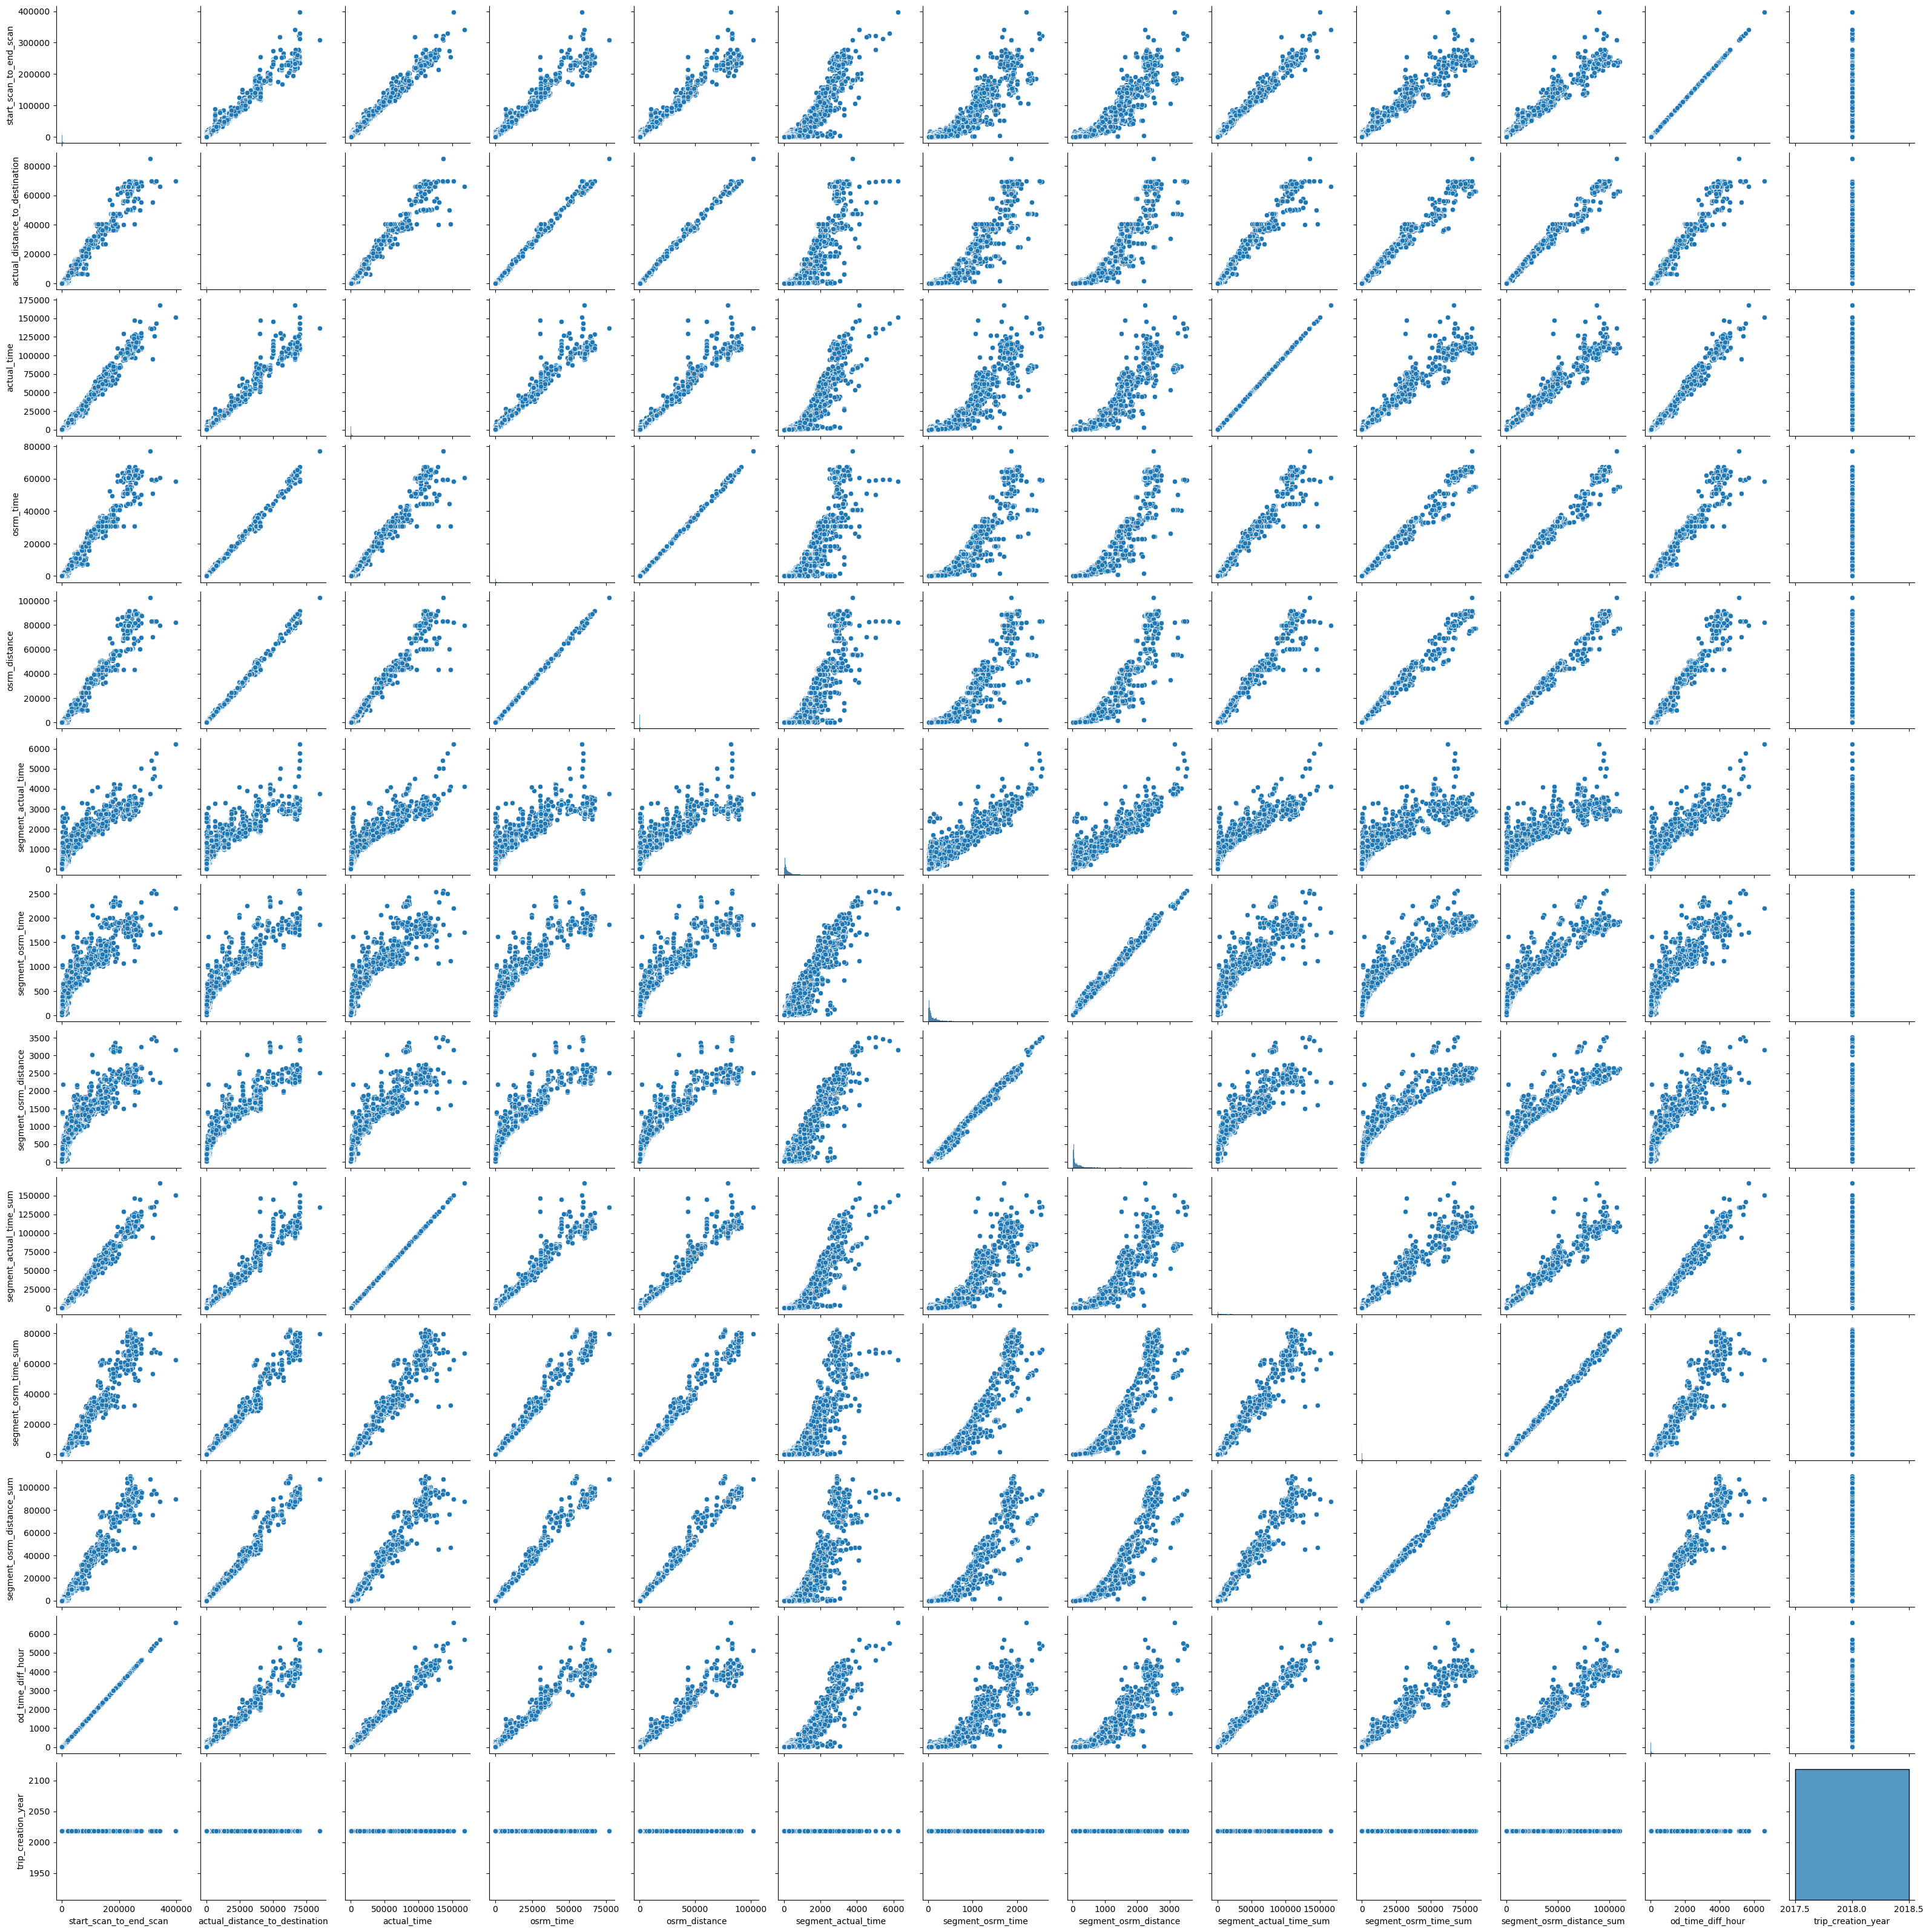

In [249]:
sns.pairplot(data=df_trips);

Observations:
- osrm_distance and actual distance to destination seems to have linear relationship
- osrm_time and actual distance to destination seems to have linear relationship
- actual_time and actual distance to destination seems to have linear relationship
- osrm_distance, osrm_time, actual time and actual distance have the same behaviors with start_csam to end scan
- osrm time and osrm distance has same behaviour wiht the actual time.



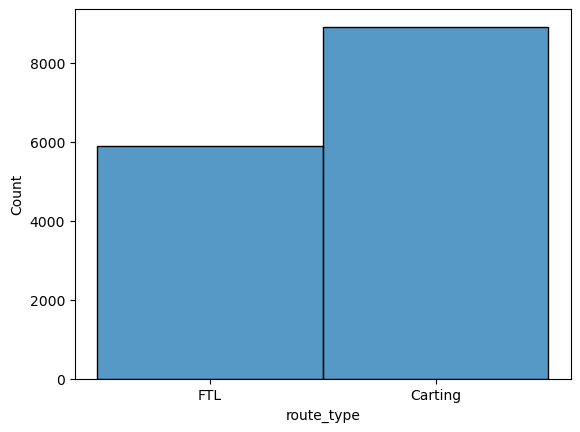

In [250]:
sns.histplot(data=df_trips, x='route_type');
# df_trips['route_type'].value_counts()

- From 14817 total different trips , we have 
- 8908 (60%) of the trip-routes are Carting , which consists of small vehicles
- 5909 (40%) of total trip-routes are FTL : which are Full Truck Load get to the destination sooner. As no other pickups  or drop offs along the way

In [251]:
cat_cols, num_cols

(Index(['route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center',
        'source_name', 'destination_center', 'destination_name', 'segment_key',
        'source_city', 'source_state', 'destination_city', 'destination_state',
        'source_place', 'destination_place', 'source_pincode',
        'destination_pincode', 'trip_creation_day', 'trip_creation_month'],
       dtype='object'),
 Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
        'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
        'segment_osrm_time', 'segment_osrm_distance', 'segment_actual_time_sum',
        'segment_osrm_time_sum', 'segment_osrm_distance_sum',
        'od_time_diff_hour'],
       dtype='object'))

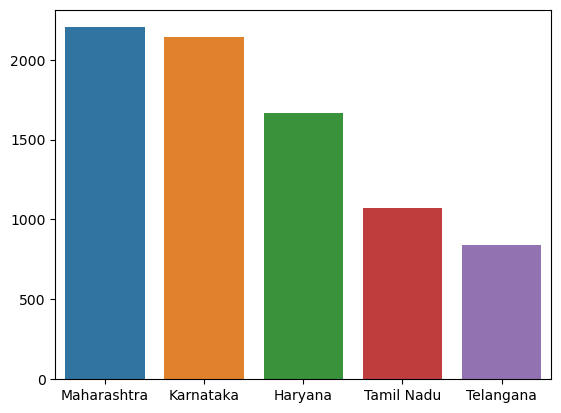

In [252]:
# sns.histplot(df_trips['destination_place'].value_counts()[:10]);
# df_trips['destination_place'].value_counts() 
sns.barplot(x=df_trips['destination_state'].value_counts().index[:5], y=df_trips['destination_state'].value_counts().values[:5]);


Maharastra, karnataka, Haryana, Tamilnadu and Telengana are the top 5 state where the order are sent.

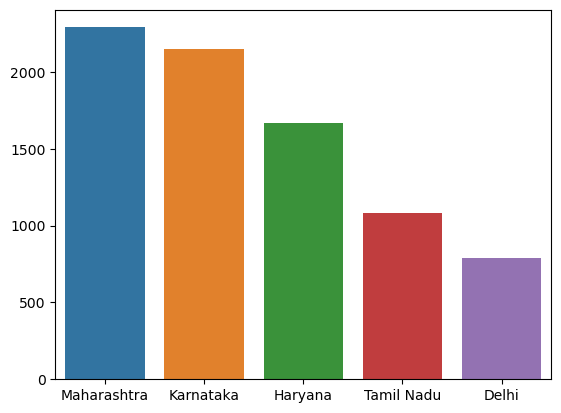

In [253]:
sns.barplot(x=df_trips['source_state'].value_counts().index[:5], y=df_trips['source_state'].value_counts().values[:5]);

Maharastra, karnataka, Haryana, Tamilnadu and Delhi are the top 5 state where the order are sent from.
Maharastra, karnataka, Haryana, Tamilnadu : most contributor of the business.


In [254]:
num_cols

Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum',
       'od_time_diff_hour'],
      dtype='object')

#### Converting the time into hours

In [255]:
df_trips["start_scan_to_end_scan"] = df_trips["start_scan_to_end_scan"]/60
df_trips["actual_time"] = df_trips["actual_time"]/60
df_trips["osrm_time"] = df_trips["osrm_time"]/60
df_trips["segment_actual_time"] = df_trips["segment_actual_time"]/60
df_trips["segment_osrm_time"] = df_trips["segment_osrm_time"]/60
df_trips["segment_actual_time_sum"] = df_trips["segment_actual_time_sum"]/60
df_trips["segment_osrm_time_sum"] = df_trips["segment_osrm_time_sum"]/60

## In-depth analysis and feature engineering:

Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required.
- Already done - col name: od_time_diff_hour
- Compare the difference between od_time_diff_hour and start_scan_to_end_scan.

- H0: Mean of time taken between start and end, trip time = Mean of start and end, scan time
- Ha: Mean of time taken between start and end, trip time != Mean of start and end, scan time

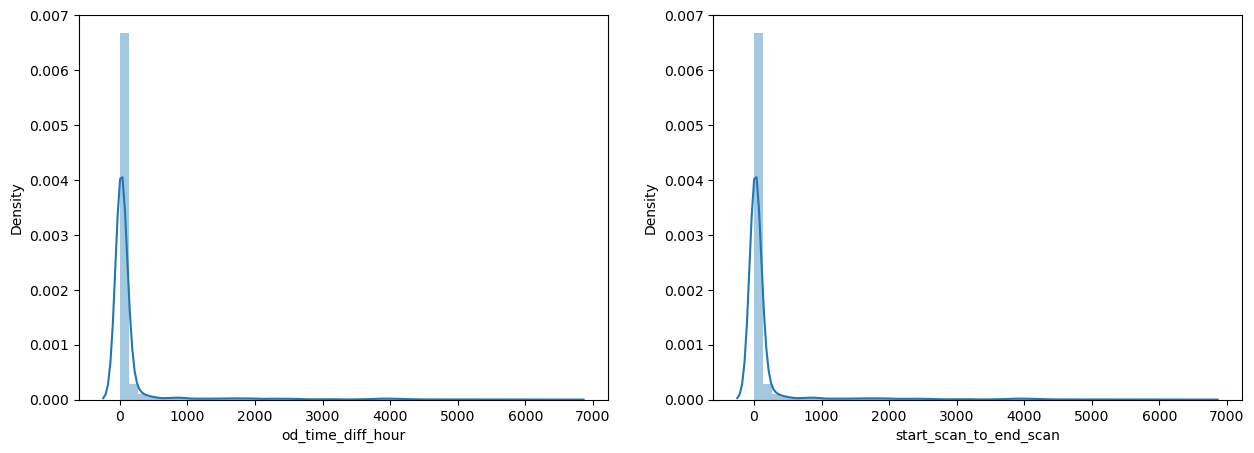

In [256]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df_trips["od_time_diff_hour"]);
plt.subplot(122)
sns.distplot(df_trips["start_scan_to_end_scan"]);

In [257]:
# You could use a two-sample t-test to test the hypothesis
t, p = stats.ttest_ind(df_trips["od_time_diff_hour"]
                ,df_trips["start_scan_to_end_scan"])

# If p-value is less than 0.05, reject the null hypothesis
if p < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

Fail to reject H0


In [258]:
# Also checking mean and standard deviation for Trip time: 
df_trips["od_time_diff_hour"].mean(), df_trips["od_time_diff_hour"].std()

(156.83660937693327, 562.3491955445651)

In [259]:
# Also checking mean and standard deviation for Scan time : 
df_trips["start_scan_to_end_scan"].mean(), df_trips["start_scan_to_end_scan"].std()

(156.75593088523703, 562.2486765652079)

- We have noticed that mean and the std deviation is almost same. Hence we can say that they both are same.

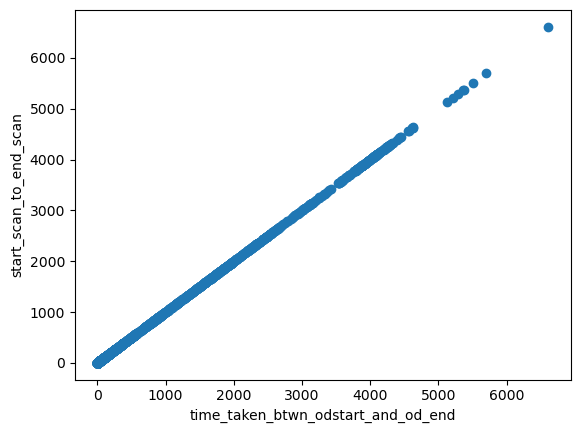

In [261]:
# Visual analysis
# scatter plot to visualize the relationship between the two columns
plt.scatter(df_trips["od_time_diff_hour"], df_trips["start_scan_to_end_scan"])
plt.xlabel('time_taken_btwn_odstart_and_od_end')
plt.ylabel('start_scan_to_end_scan')
plt.show()

## Analysing Actual Time taken to complete the delivery  &  start-scan-end-scan

- H0: Mean of start and end scan time <=  Mean of Actual time taken to complete delivery 
- Ha: Mean of start and end scan time  > Mean of Actual time taken to complete delivery


<AxesSubplot: xlabel='start_scan_to_end_scan', ylabel='Density'>

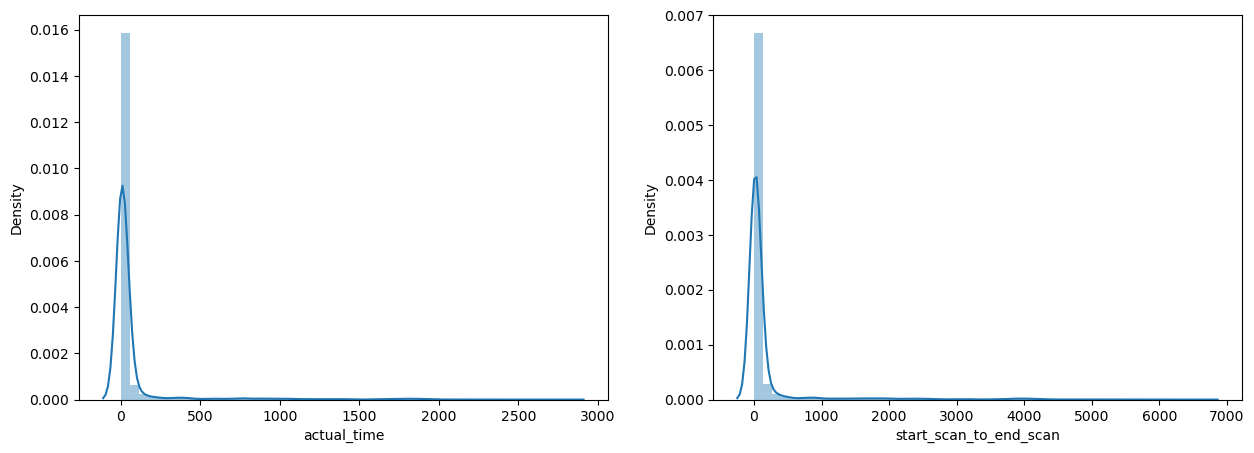

In [262]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot((df_trips["actual_time"]))
plt.subplot(122)
sns.distplot((df_trips["start_scan_to_end_scan"]))

In [263]:
# KS-test : Checking the distributions how closely and equally they are
stats.ks_2samp(df_trips["actual_time"],df_trips["start_scan_to_end_scan"])

KstestResult(statistic=0.2968823966998039, pvalue=0.0)

In [264]:
for i in range(7):
    print(stats.ttest_ind((df_trips["actual_time"].sample(3000))
                ,(df_trips["start_scan_to_end_scan"].sample(3000)),alternative="less"))

Ttest_indResult(statistic=-7.635688553114515, pvalue=1.29907506284059e-14)
Ttest_indResult(statistic=-6.960912864809587, pvalue=1.8706234052159524e-12)
Ttest_indResult(statistic=-7.988882498198373, pvalue=8.101017113969759e-16)
Ttest_indResult(statistic=-7.014086204321175, pvalue=1.284614403917845e-12)
Ttest_indResult(statistic=-7.5238368912015385, pvalue=3.051277459002775e-14)
Ttest_indResult(statistic=-7.953808657316631, pvalue=1.0728134296729542e-15)
Ttest_indResult(statistic=-8.949697619820958, pvalue=2.338568151827942e-19)


In [265]:
# You could use a two-sample t-test to test the hypothesis
t, p = stats.ttest_ind((df_trips["actual_time"].sample(3000)), (df_trips["start_scan_to_end_scan"].sample(3000)),alternative="less")

# If p-value is less than 0.05, reject the null hypothesis
if p < 0.05:
    print("Reject H0, average actual_time is less than population average start_scan_to_end_scan")
else:
    print("average actual_time is greater than or equal to population average start_scan_to_end_scan")

Reject H0, average actual_time is less than population average start_scan_to_end_scan


- from KS test for actual-time and start_scan_to_end_scan distributions are not same.

- t test of population average actual_time is less than population average start_scan_to_end_scan.

In [266]:
df_trips["actual_time"].mean(),df_trips["actual_time"].std()

(67.9916424336692, 253.8655680901963)

In [267]:
df_trips["start_scan_to_end_scan"].mean(),df_trips["start_scan_to_end_scan"].std()

(156.75593088523703, 562.2486765652079)

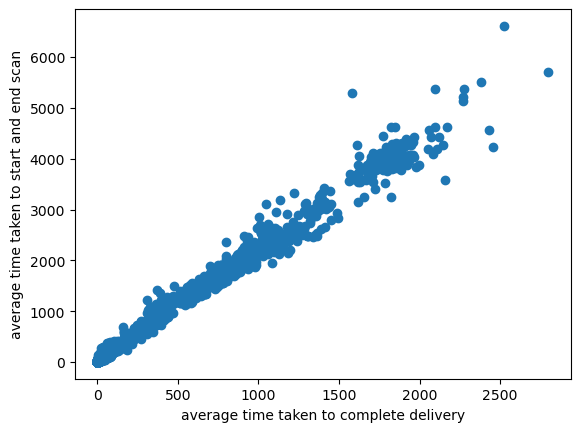

In [268]:
# Visual analysis
# scatter plot to visualize the relationship between the two columns
plt.scatter(df_trips["actual_time"],df_trips["start_scan_to_end_scan"])
plt.xlabel('average time taken to complete delivery')
plt.ylabel('average time taken to start and end scan')
plt.show()

## Analysing Actual Time & TimeTaken between start and end trip time. 

> #### H0: Mean of Actual time taken to complete delivery =  Mean of time taken betweenn trip end and start time
> #### Ha: Mean of Actual time taken to complete delivery  !=  Mean of time taken betweenn trip end and start time

In [269]:
stats.ks_2samp(df_trips["actual_time"],df_trips["od_time_diff_hour"])

KstestResult(statistic=0.2980320551836072, pvalue=0.0)

In [270]:
for i in range(5):
    print(stats.ttest_ind((df_trips["actual_time"].sample(1000))
                ,(df_trips["od_time_diff_hour"].sample(1000))))

Ttest_indResult(statistic=-3.8921394924467725, pvalue=0.00010262243467868551)
Ttest_indResult(statistic=-4.386526418016807, pvalue=1.2116942134901597e-05)
Ttest_indResult(statistic=-5.333072684957138, pvalue=1.0749554235784431e-07)
Ttest_indResult(statistic=-4.8210855176895855, pvalue=1.5355609265890963e-06)
Ttest_indResult(statistic=-4.229438578252862, pvalue=2.448555434879528e-05)


In [272]:
# You could use a two-sample t-test to test the hypothesis
t, p = stats.ttest_ind((df_trips["actual_time"].sample(1000)),
                       (df_trips["od_time_diff_hour"].sample(1000)))

# If p-value is less than 0.05, reject the null hypothesis
if p < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

Reject H0


- from above kstest of distribution and two sample ttest , 
- we can conclude that population mean `actual_time` taken to complete delivery and population mean `time_taken_btwn_od_start_and_od_end` are also not same.

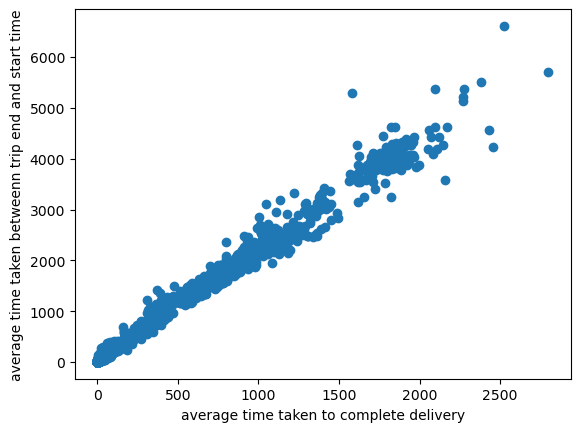

In [273]:
# Visual analysis
# scatter plot to visualize the relationship between the two columns
plt.scatter(df_trips["actual_time"],df_trips["od_time_diff_hour"])
plt.xlabel('average time taken to complete delivery')
plt.ylabel('average time taken betweenn trip end and start time')
plt.show()

## Analysing  Actual Time   taken to complete delivery from source to destination hub    &   OSRM measured time : 

> #### H0: Mean of OSRM time  >=  Mean of Actual time taken to complete delivery
> #### Ha: Mean of OSRM time  <  Mean of Actual time taken to complete delivery 

<AxesSubplot: xlabel='osrm_time', ylabel='Density'>

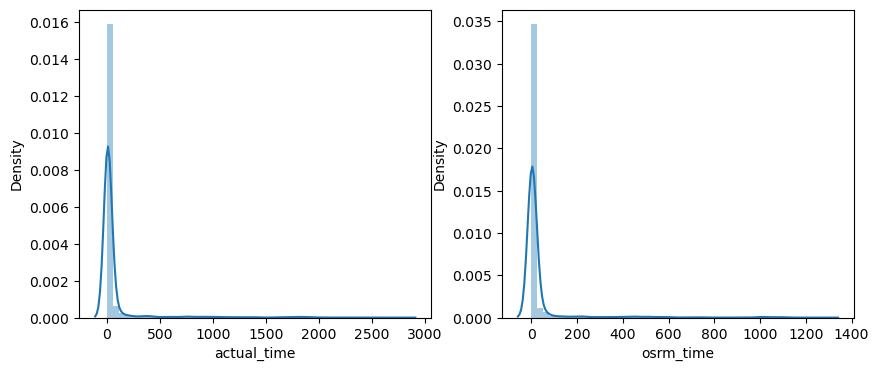

In [274]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((df_trips["actual_time"])))
plt.subplot(122)
sns.distplot(((df_trips["osrm_time"])))

In [ ]:
stats.ks_2samp(df_trips["actual_time"], df_trips["osrm_time"])

KstestResult(statistic=0.2945265573327934, pvalue=0.0)

In [275]:
for i in range(5):
    print(stats.ttest_ind(df_trips["actual_time"].sample(5000),
               df_trips["osrm_time"].sample(5000),alternative='greater'))

Ttest_indResult(statistic=6.631012416431635, pvalue=1.753087108766516e-11)
Ttest_indResult(statistic=9.367926079304924, pvalue=4.4985380074823884e-21)
Ttest_indResult(statistic=7.260231763304528, pvalue=2.076048899753332e-13)
Ttest_indResult(statistic=8.778645759924096, pvalue=9.626569725429977e-19)
Ttest_indResult(statistic=8.801898856670016, pvalue=7.8391692236694435e-19)


In [277]:
# You could use a two-sample t-test to test the hypothesis
t, p = stats.ttest_ind(df_trips["actual_time"].sample(5000),
               df_trips["osrm_time"].sample(5000),alternative='greater')

# If p-value is less than 0.05, reject the null hypothesis
if p < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

Reject H0


- from two sample t test we can conclude that population mean actual time taken to complete delivery  from source to warehouse and osrm estimate mean time for population are not same. 
- actual time is higher than the osrm estimated time for delivery.

In [278]:
df_trips["actual_time"].mean(),df_trips["actual_time"].std()

(67.9916424336692, 253.8655680901963)

In [279]:
df_trips["osrm_time"].mean(),df_trips["osrm_time"].std()

(34.88052343274498, 132.74615926051666)

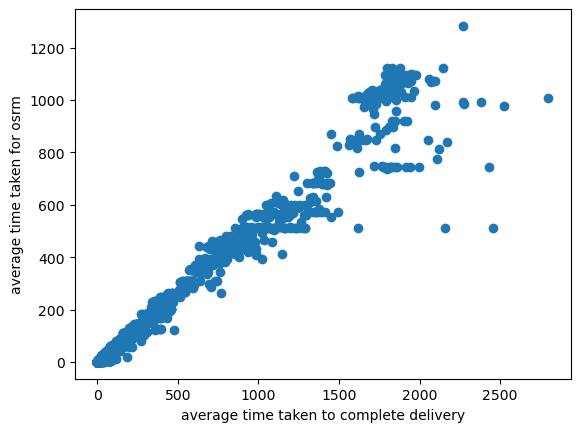

In [280]:
# Visual analysis
# scatter plot to visualize the relationship between the two columns
plt.scatter(df_trips["actual_time"], df_trips["osrm_time"])
plt.xlabel('average time taken to complete delivery')
plt.ylabel('average time taken for osrm')
plt.show()

## Analysing Actual Time taken to complete delivery from source to destination hub & Segment Actual Time :  

> #### H0: Actual time = segment actual time
> #### Ha: Actual time != segment actual time

<AxesSubplot: xlabel='segment_actual_time', ylabel='Density'>

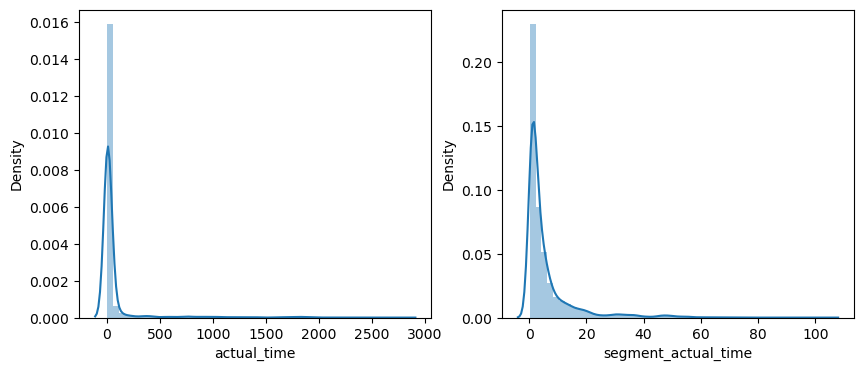

In [281]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((df_trips["actual_time"])))
plt.subplot(122)
sns.distplot(((df_trips["segment_actual_time"])))

In [282]:
for i in range(7):
    print(stats.ttest_ind((df_trips["actual_time"].sample(3000)),
                (df_trips["segment_actual_time"].sample(3000))))

Ttest_indResult(statistic=13.462963779557164, pvalue=1.0036999520801433e-40)
Ttest_indResult(statistic=13.587477050877647, pvalue=1.9410247390391366e-41)
Ttest_indResult(statistic=13.37507177755545, pvalue=3.1741154414635605e-40)
Ttest_indResult(statistic=13.605410798585828, pvalue=1.530211081935874e-41)
Ttest_indResult(statistic=13.282680302162301, pvalue=1.0566968292678186e-39)
Ttest_indResult(statistic=13.778653062500545, pvalue=1.5154456630522577e-42)
Ttest_indResult(statistic=13.959273451165352, pvalue=1.32131820527262e-43)


In [283]:
# You could use a two-sample t-test to test the hypothesis
t, p = stats.ttest_ind((df_trips["actual_time"].sample(3000)),
                (df_trips["segment_actual_time"].sample(3000)))

# If p-value is less than 0.05, reject the null hypothesis
if p < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

Reject H0


- from two sample ttest , we can conclude that population average for Actual Time taken to complete delivery trip and segment actual time are same. 


In [284]:
df_trips["actual_time"].mean(),df_trips["actual_time"].std()

(67.9916424336692, 253.8655680901963)

In [285]:
df_trips["segment_actual_time"].mean(),df_trips["segment_actual_time"].std()

(5.884319559973851, 9.272765180437883)

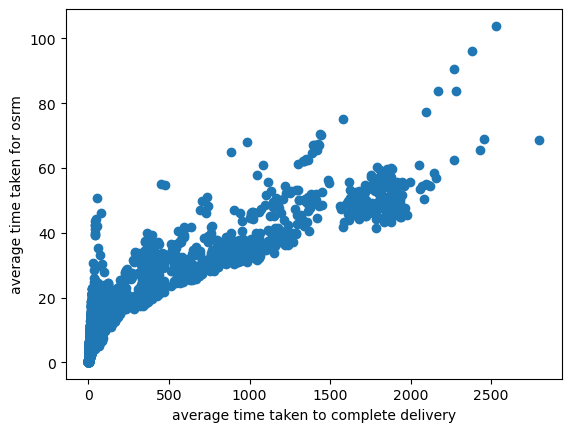

In [286]:
# Visual analysis
# scatter plot to visualize the relationship between the two columns
plt.scatter(df_trips["actual_time"], df_trips["segment_actual_time"])
plt.xlabel('average time taken to complete delivery')
plt.ylabel('average time taken for osrm')
plt.show()

## Analysing osrm Time  & segment-osrm-time :  

> #### H0: segment actual time <= OSRM time
> #### Ha: segment actual time > OSRM time

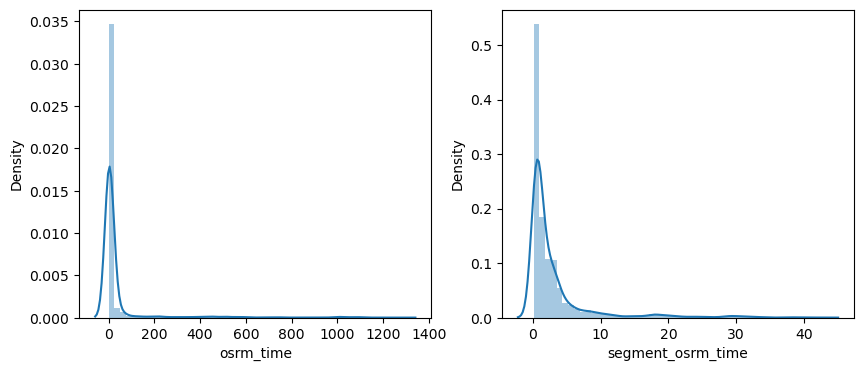

In [288]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((df_trips["osrm_time"])));
plt.subplot(122)
sns.distplot(((df_trips["segment_osrm_time"])));

In [289]:
for i in range(7):
    print(stats.ttest_ind((df_trips["osrm_time"].sample(3000)),
                (df_trips["segment_osrm_time"].sample(3000)),alternative ="less"))

Ttest_indResult(statistic=13.98004023377243, pvalue=1.0)
Ttest_indResult(statistic=12.276323933938828, pvalue=1.0)
Ttest_indResult(statistic=12.79945691666862, pvalue=1.0)
Ttest_indResult(statistic=13.25241939284196, pvalue=1.0)
Ttest_indResult(statistic=12.850723995058669, pvalue=1.0)
Ttest_indResult(statistic=13.077260118158907, pvalue=1.0)
Ttest_indResult(statistic=13.334169745730446, pvalue=1.0)


In [290]:
# We can use a two-sample t-test to test the hypothesis
t, p = stats.ttest_ind((df_trips["osrm_time"].sample(3000)),
                (df_trips["segment_osrm_time"].sample(3000)),alternative ="less")

# If p-value is less than 0.05, we reject the null hypothesis
if p < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

Fail to reject H0


- from ttest , we can conclude that average of osrm Time & segment-osrm-time for population is not same.
- Population Mean osrm time is less than Population Mean segment osrm time.


In [291]:
df_trips["osrm_time"].mean(),df_trips["osrm_time"].std()

(34.88052343274498, 132.74615926051666)

In [292]:
df_trips["segment_osrm_time"].mean(),df_trips["segment_osrm_time"].std()


(3.0085266337548746, 5.244654656606672)

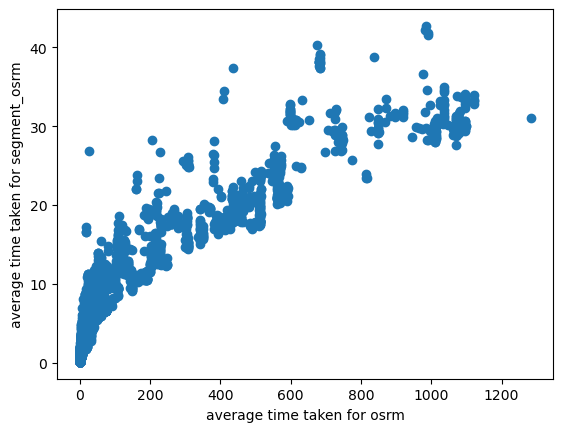

In [293]:
# Visual analysis
# scatter plot to visualize the relationship between the two columns
plt.scatter(df_trips["osrm_time"], df_trips["segment_osrm_time"])
plt.xlabel('average time taken for osrm')
plt.ylabel('average time taken for segment_osrm')
plt.show()

# Analysing Distances measures : 

## Analysing and Visulizing OSRM Estimated distance and Segment-osrm-distance  :

> #### H0 : Segment OSRM distance <= OSRM distance
> #### Ha : Segment OSRM distance > OSRM distance

<AxesSubplot: xlabel='segment_osrm_distance', ylabel='Density'>

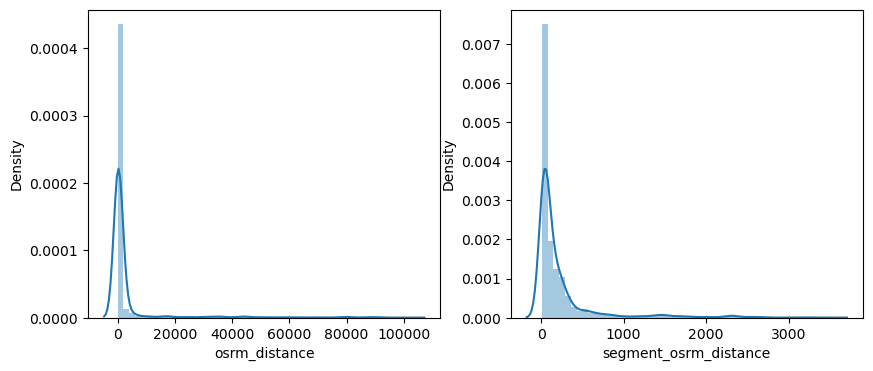

In [294]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((df_trips["osrm_distance"])))
plt.subplot(122)
sns.distplot(((df_trips["segment_osrm_distance"])))

In [ ]:
stats.ks_2samp(df_trips["osrm_distance"],df_trips["segment_osrm_distance"])

KstestResult(statistic=0.03948167645272321, pvalue=1.8042208791084262e-10)

In [295]:
for i in range(7):
    print(stats.ttest_ind(df_trips["osrm_distance"].sample(5000),
               df_trips["segment_osrm_distance"].sample(5000),alternative="less"))

Ttest_indResult(statistic=17.049907799602074, pvalue=1.0)
Ttest_indResult(statistic=17.393832244575073, pvalue=1.0)
Ttest_indResult(statistic=17.116531004350247, pvalue=1.0)
Ttest_indResult(statistic=16.209335756046606, pvalue=1.0)
Ttest_indResult(statistic=16.621038766795234, pvalue=1.0)
Ttest_indResult(statistic=17.003051189393585, pvalue=1.0)
Ttest_indResult(statistic=16.50457436483135, pvalue=1.0)


In [296]:
# We can use a two-sample t-test to test the hypothesis
t, p = stats.ttest_ind(df_trips["osrm_distance"].sample(5000),
               df_trips["segment_osrm_distance"].sample(5000),alternative="less")  
# If p-value is less than 0.05, we reject the null hypothesis
if p < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

Fail to reject H0


- from KS test , we can conclude the distributions of segment osrm distance and osrm distance are not same! 
- from two sample one sided ttest, we can conclude that Average of osrm distance for population is less than  average of segment osrm distance 

In [297]:
df_trips["osrm_distance"].mean(),df_trips["osrm_distance"].std()

(2786.86703365118, 10769.741064841754)

In [298]:
df_trips["segment_osrm_distance"].mean(),df_trips["segment_osrm_distance"].std()

(222.7054664434977, 416.84627901238525)

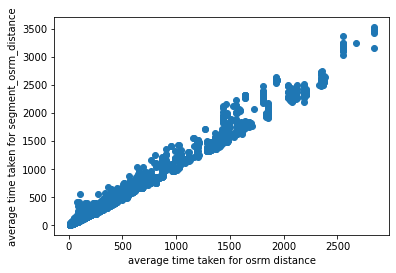

In [ ]:
# Visual analysis
# scatter plot to visualize the relationship between the two columns
plt.scatter(osrm_distance["osrm_distance"], segment_osrm_distance["segment_osrm_distance"])
plt.xlabel('average time taken for osrm distance')
plt.ylabel('average time taken for segment_osrm_distance')
plt.show()

## Analysing and Visulizing OSRM Estimated distance and Actual Distance between source and destination warehouse :

> #### H0 : Mean OSRM distance <= Mean Actual distnace 
> #### Ha : Mean OSRM distance > Mean Actual distnace 

<AxesSubplot: xlabel='actual_distance_to_destination', ylabel='Density'>

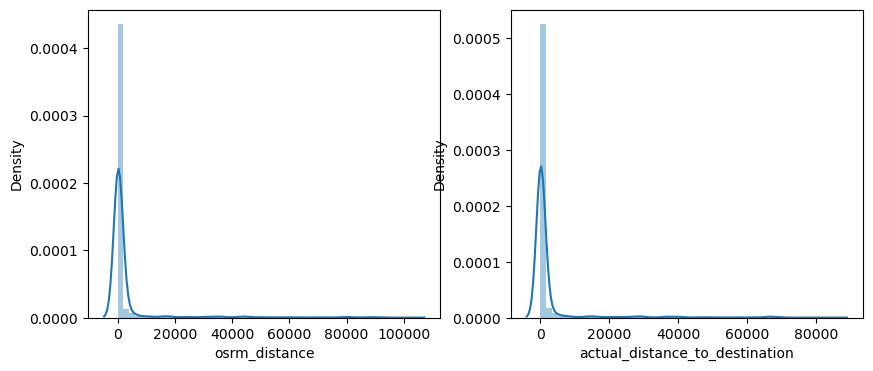

In [299]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((df_trips["osrm_distance"])))
plt.subplot(122)
sns.distplot(((df_trips["actual_distance_to_destination"])))

In [300]:
stats.ks_2samp(df_trips["osrm_distance"],df_trips["actual_distance_to_destination"])

KstestResult(statistic=0.13322513018191656, pvalue=6.637045782509583e-115)

In [301]:
for i in range(5):
    print(stats.ttest_ind(df_trips["osrm_distance"].sample(5000),
               df_trips["actual_distance_to_destination"].sample(5000),alternative="greater"))

Ttest_indResult(statistic=2.6751372055203153, pvalue=0.0037410142848038567)
Ttest_indResult(statistic=3.3991258344570388, pvalue=0.00033932835449560373)
Ttest_indResult(statistic=1.7829865345151539, pvalue=0.037309412728806245)
Ttest_indResult(statistic=1.4179487172565464, pvalue=0.07811845160679622)
Ttest_indResult(statistic=2.9298503082871092, pvalue=0.0016994600433773467)


In [302]:
# We can use a two-sample t-test to test the hypothesis
t, p = stats.ttest_ind(df_trips["osrm_distance"].sample(5000),
               df_trips["actual_distance_to_destination"].sample(5000),alternative="greater")  
# If p-value is less than 0.05, we reject the null hypothesis
if p < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

Reject H0


- From left sided ttest , we can conclude that population OSRM estimated distance is higher than the actual distance  from source to destination warehouse. 

In [303]:
df_trips["osrm_distance"].mean(),df_trips["osrm_distance"].std()

(2786.86703365118, 10769.741064841754)

In [304]:
df_trips["actual_distance_to_destination"].mean(),df_trips["actual_distance_to_destination"].std()

(2290.673674693915, 8806.795817463084)

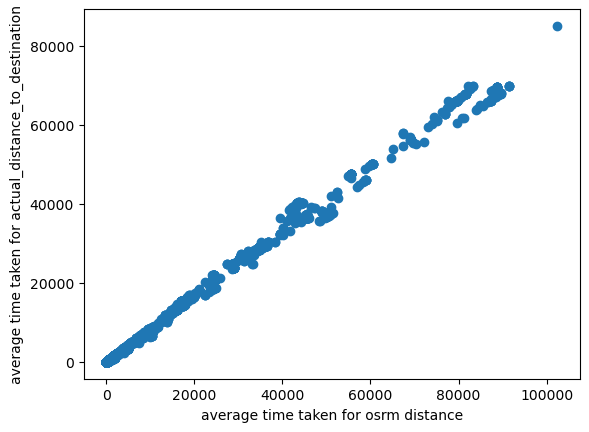

In [306]:
# Visual analysis
# scatter plot to visualize the relationship between the two columns
plt.scatter(df_trips["osrm_distance"], df_trips["actual_distance_to_destination"])
plt.xlabel('average time taken for osrm distance')
plt.ylabel('average time taken for actual_distance_to_destination')
plt.show()

## Treating Outliers : 

In [308]:
df_trips.columns

Index(['trip_creation_time', 'route_schedule_uuid', 'route_type', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_key', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum',
       'od_time_diff_hour', 'source_city', 'source_state', 'destination_city',
       'destination_state', 'source_place', 'destination_place',
       'source_pincode', 'destination_pincode', 'trip_creation_day',
       'trip_creation_month', 'trip_creation_year'],
      dtype='object')

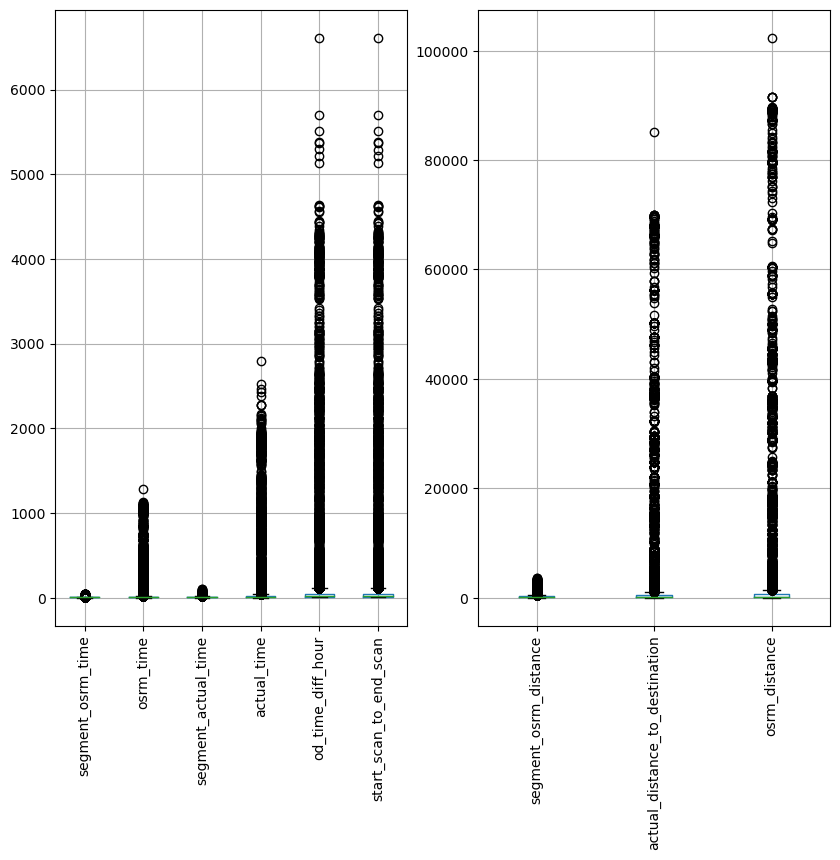

In [309]:
plt.figure(figsize = (10,8))
plt.subplot(121)
df_trips[['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'od_time_diff_hour', 'start_scan_to_end_scan']].boxplot()
plt.xticks(rotation =90)
plt.subplot(122)
df_trips[['segment_osrm_distance', 'actual_distance_to_destination',
       'osrm_distance']].boxplot()
plt.xticks(rotation =90)
plt.show()

In [311]:
outlier_treatment  = df_trips.copy()

In [312]:
outlier_treatment_num = outlier_treatment[['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'od_time_diff_hour', 'start_scan_to_end_scan',
        'segment_osrm_distance', 'actual_distance_to_destination',
        'osrm_distance']]

## After removing outliers from all numerical features :  

In [313]:
trip_records_without_outliers = df_trips.loc[outlier_treatment_num[(np.abs(stats.zscore(outlier_treatment_num)) < 3).all(axis=1)].index]
trip_records_without_outliers

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,...,source_state,destination_city,destination_state,source_place,destination_place,source_pincode,destination_pincode,trip_creation_day,trip_creation_month,trip_creation_year
0,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),727.650000,8860.812105,...,Madhya Pradesh,Gurgaon,Haryana,Trnsport,Bilaspur,462022,000000,Wednesday,September,2018
1,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),15.100000,240.208306,...,Karnataka,Chikblapur,Karnataka,Veersagr,ShntiSgr,572101,562101,Wednesday,September,2018
3,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),3.333333,28.529648,...,Hub Maharashtra,Mumbai,Maharashtra,None,MiraRd,400072,401104,Wednesday,September,2018
4,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),26.433333,239.007304,...,Karnataka,Bellary,Karnataka,Dc (Karnataka),Dc (Karnataka),583101,583101,Wednesday,September,2018
5,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),4.150000,34.407865,...,Tamil Nadu,Chennai,Tamil Nadu,Porur,Sriperumbudur,600116,602105,Wednesday,September,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),14.600000,141.057373,...,Punjab,Chandigarh,Punjab,Mehmdpur,Mehmdpur,160002,160002,Wednesday,October,2018
14783,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2.000000,25.130640,...,Haryana,Faridabad,Haryana,Balabhgarh,Blbgarh,121004,121004,Wednesday,October,2018
14784,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),21.050000,93.743842,...,Uttar Pradesh,Kanpur,Uttar Pradesh,Central,Central,209304,209304,Wednesday,October,2018
14785,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),21.916667,355.281673,...,Tamil Nadu,Tirunelveli,Tamil Nadu,VdkkuSrt,VdkkuSrt,627005,627005,Wednesday,October,2018


In [317]:
trip_records_without_outliers = trip_records_without_outliers[['trip_uuid','route_type','segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'od_time_diff_hour', 'start_scan_to_end_scan',
       'segment_osrm_distance', 'actual_distance_to_destination',
       'osrm_distance']]

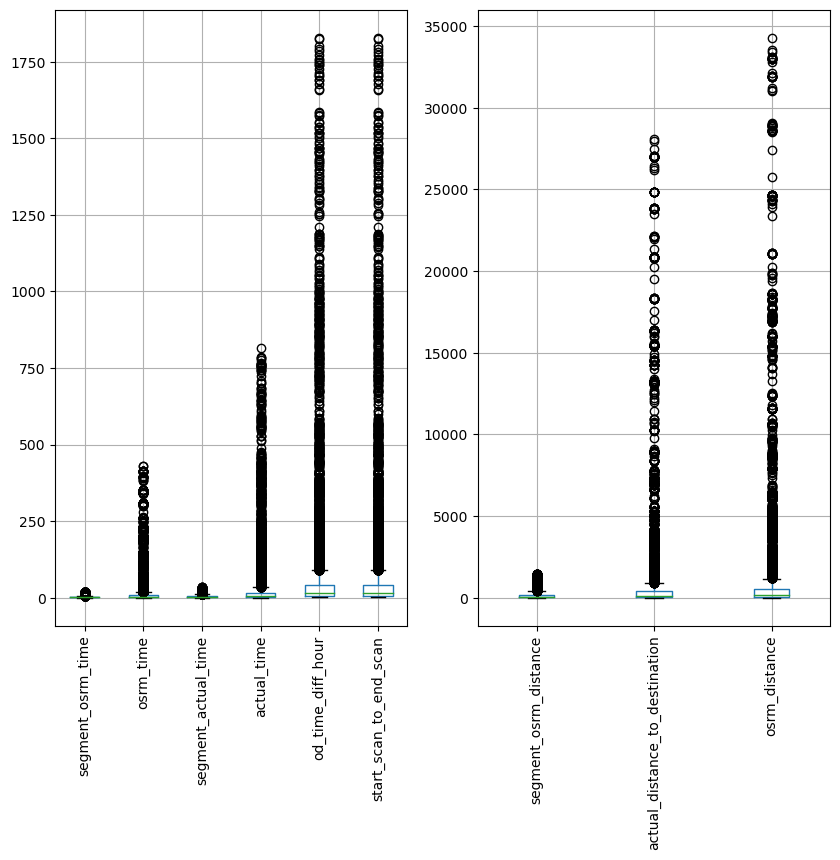

In [319]:
plt.figure(figsize = (10,8))
plt.subplot(121)
trip_records_without_outliers[['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'od_time_diff_hour', 'start_scan_to_end_scan']].boxplot()
plt.xticks(rotation =90)
plt.subplot(122)
trip_records_without_outliers[['segment_osrm_distance', 'actual_distance_to_destination',
       'osrm_distance']].boxplot()
plt.xticks(rotation =90)
plt.show()

## Processing Data for One hot encoding : 

- merging locations details into one columns and re categorise the data as per highest trips having location as top category 


In [334]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [338]:
df_trips.columns

Index(['trip_creation_time', 'route_schedule_uuid', 'route_type', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_key', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum',
       'od_time_diff_hour', 'source_city', 'source_state', 'destination_city',
       'destination_state', 'source_place', 'destination_place',
       'source_pincode', 'destination_pincode', 'trip_creation_day',
       'trip_creation_month', 'trip_creation_year'],
      dtype='object')

In [337]:
scaler = StandardScaler()
std_data = scaler.fit_transform(df_trips[['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'od_time_diff_hour',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance']])
std_data = pd.DataFrame(std_data, columns=['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'od_time_diff_hour',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance'])
std_data.head()

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,od_time_diff_hour,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,2.629714,0.714944,2.147833,0.761748,1.015723,1.015411,2.633597,0.746056,0.723431
1,-0.367090,-0.236403,-0.381163,-0.241639,-0.251840,-0.251954,-0.332307,-0.232835,-0.233759
2,5.594737,7.994873,5.311326,7.100159,7.092043,7.091575,5.571936,7.480025,8.046926
3,-0.522809,-0.259757,-0.528553,-0.262451,-0.272948,-0.272882,-0.486596,-0.256872,-0.255838
4,-0.208192,-0.236780,-0.023473,-0.231331,-0.231818,-0.231796,-0.182120,-0.232972,-0.234050


In [342]:
scaler = MinMaxScaler()
MinMax_data = scaler.fit_transform(df_trips[['segment_osrm_time','osrm_time','segment_actual_time','actual_time',
 'od_time_diff_hour','start_scan_to_end_scan','segment_osrm_distance','actual_distance_to_destination',
 'osrm_distance']])
MinMax_data = pd.DataFrame(MinMax_data,columns=['segment_osrm_time',
 'osrm_time','segment_actual_time','actual_time','time_taken_btwn_odstart_and_od_end','start_scan_to_end_scan',
 'segment_osrm_distance','actual_distance_to_destination','osrm_distance'])
MinMax_data.head()

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,0.391712,0.101122,0.247388,0.093341,0.110013,0.109969,0.373134,0.104014,0.103203
1,0.023065,0.002651,0.021218,0.002323,0.002235,0.002218,0.021373,0.002717,0.002542
2,0.756450,0.854640,0.530301,0.668306,0.626670,0.626566,0.721625,0.800858,0.873362
3,0.003909,0.000234,0.008037,0.000435,0.000440,0.000439,0.003074,0.000229,0.000220
4,0.042611,0.002612,0.053207,0.003258,0.003937,0.003932,0.039185,0.002703,0.002512


In [343]:
std_data

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,od_time_diff_hour,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,2.629714,0.714944,2.147833,0.761748,1.015723,1.015411,2.633597,0.746056,0.723431
1,-0.367090,-0.236403,-0.381163,-0.241639,-0.251840,-0.251954,-0.332307,-0.232835,-0.233759
2,5.594737,7.994873,5.311326,7.100159,7.092043,7.091575,5.571936,7.480025,8.046926
3,-0.522809,-0.259757,-0.528553,-0.262451,-0.272948,-0.272882,-0.486596,-0.256872,-0.255838
4,-0.208192,-0.236780,-0.023473,-0.231331,-0.231818,-0.231796,-0.182120,-0.232972,-0.234050
...,...,...,...,...,...,...,...,...,...
14782,-0.376623,-0.244188,-0.487212,-0.255623,-0.252843,-0.252843,-0.378690,-0.244094,-0.243646
14783,-0.538699,-0.260384,-0.596856,-0.265668,-0.275313,-0.275254,-0.495684,-0.257258,-0.256313
14784,-0.293997,-0.245945,-0.129522,-0.231791,-0.241372,-0.241371,-0.282653,-0.249467,-0.243655
14785,0.128670,-0.206771,-0.170863,-0.228442,-0.239770,-0.239830,0.001984,-0.219769,-0.217035


In [ ]:
Standardized_Data = pd.concat([std_data,one_hot_encoded_data],axis = 1)

In [ ]:
Min_Max_Scaled_Data = pd.concat([MinMax_data,one_hot_encoded_data],axis = 1)

In [ ]:
Standardized_Data.sample(5)

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_type_Carting,route_type_FTL,city_Category 1,city_Category 2,city_Category 3,city_Category 4,city_Category 5,city_Category 6,city_Category 7
3136,-0.709389,-0.709267,-0.748546,-0.749775,-0.912882,-0.911511,-0.666676,-0.643971,-0.673187,1,0,0,0,0,0,1,0,0
13275,0.306724,0.437615,0.425249,0.419767,0.095711,0.096966,0.119639,0.074280,0.186034,0,1,0,0,0,0,0,0,1
686,-0.586419,-0.599692,-0.718276,-0.719701,-0.741592,-0.739271,-0.606884,-0.610746,-0.625636,1,0,1,0,0,0,0,0,0
2270,-0.463450,-0.570472,-0.482844,-0.479110,-0.524668,-0.522099,-0.492127,-0.501947,-0.518382,1,0,0,0,1,0,0,0,0
13215,-0.586419,-0.570472,-0.674553,-0.672920,-0.819172,-0.816654,-0.583006,-0.575044,-0.581760,1,0,0,0,0,0,0,0,1


In [ ]:
Min_Max_Scaled_Data.sample(5)

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_type_Carting,route_type_FTL,city_Category 1,city_Category 2,city_Category 3,city_Category 4,city_Category 5,city_Category 6,city_Category 7
6713,0.145045,0.084884,0.128302,0.127535,0.166947,0.166872,0.146897,0.052705,0.073519,1,0,0,0,0,0,0,0,1
8947,0.011712,0.016279,0.061995,0.061900,0.076563,0.076671,0.005454,0.001616,0.007124,1,0,0,0,0,0,0,0,1
734,0.056757,0.058140,0.085714,0.085379,0.068421,0.068471,0.044146,0.031643,0.036588,1,0,1,0,0,0,0,0,0
7332,0.080180,0.101163,0.085175,0.084845,0.091073,0.090611,0.071827,0.072390,0.078091,0,1,0,0,0,0,0,0,1
11192,0.226126,0.297674,0.276550,0.276414,0.333567,0.333333,0.232003,0.252581,0.278220,0,1,0,0,0,0,0,0,1


# Inferences and Recommendations : 

## Insights and Observations : 

- 14817 different trips happened between source to destinations during 2018 , September and October.
- 1504 delivery routes on which trips are happenig.
- we have 1508 unique source centers and 1481 unique destination centers


- From 14817 total different trips , we have  8908 (60%) of the trip-routes are Carting , which consists of small vehicles and 5909 (40%) of total trip-routes are FTL : which are Full Truck Load get to the destination sooner. as no other pickups or drop offs along the way .

#### Hypothesis tests Results : 
  - from 2 sample t-test ,we can also conclude that 
  
  - Average time_taken_btwn_odstart_and_od_end for population is equal to Average start_scan_to_end_scan for population.

  - population average actual_time is less than population average start_scan_to_end_scan.

  - population mean Actual time taken to complete delivery and population mean time_taken_btwn_od_start_and_od_end are also not same.

  - Mean of actual time is higher than Mean of the OSRM estimated time for delivery

  - Population average for Actual Time taken to complete delivery trip and segment actual time are same.

  - Average of OSRM Time & segment-osrm-time for population is not same.
  
  - Population Mean osrm time is less than Population Mean segment osrm time.

  - Average of OSRM distance for population is less than average of segment OSRM distance

  - population OSRM estimated distance is higher than the actual distance from source to destination warehouse.


## Recommendations : 

- As per analysis, It is recommended to use Carting (small vehicles) for delivery with in the city in order to reduce the delivery time, and Heavy trucks for long distance trips or heavy load. based on this , we can optimize the delivery time as well as increase the revenue as per requirements. 
- Incresing the connectivity in tier 2 and tier 3 cities along with profession tie-ups with several e-commerce giants can increase the revenue as well as the reputation on connectivity across borders. 
- We can work on  optimizing the scanning time on both ends which is start scanning time and end scanning time so that the delivery time can be equated to the OSRM estimated delivery time.

